In [ ]:
from skimage.feature import local_binary_pattern
import numpy as np
import pandas as pd

In [ ]:
#Avinash Jairam
#Random and ++ Kemans Clustering on binary dataset (2 classes)


#This work is a hodgepodge of several tutorials inclusive of the material taught by Professor Sos Agaian and online sources
#Various online sources have inspired this work. They are cited throughtout the code
#All efforts have been made to ensure that the appropriate sources have been cited

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from itertools import combinations
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.special import comb
from sklearn.metrics import jaccard_score
from sklearn.decomposition import PCA
from skimage.io import imread, imshow
from skimage.transform import  resize
from google.colab import drive


from skimage.feature import local_binary_pattern
import pandas as pd 
import numpy as np 
from skimage.color import rgb2gray
from skimage.filters import prewitt_h,prewitt_v



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from skimage.filters import prewitt_h,prewitt_v

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


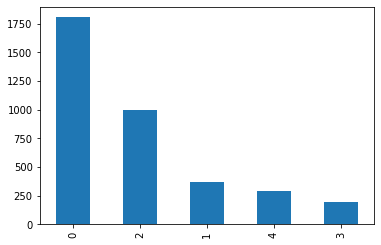

In [ ]:
df['diagnosis'].value_counts().plot(kind='bar');


In [ ]:
Samplesize = 193  #number of samples that you want       
#source: https://stackoverflow.com/questions/41858827/selecting-n-elements-of-each-class
df = df.groupby('diagnosis', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, Samplesize, False),:])

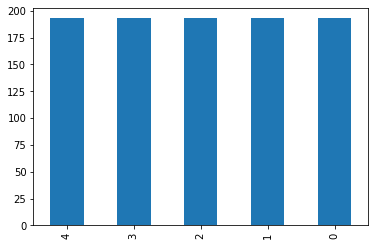

In [ ]:
df['diagnosis'].value_counts().plot(kind='bar');


In [ ]:
df.head()

id_code  diagnosis
0 1839  8191ae701985          0
  2742  bdf47b9f10c4          0
  3247  e1c02f6c3362          0
  2619  b5e6ae31493c          0
  3405  ec57cc20d776          0

In [ ]:
df1 = df.loc[(df['diagnosis'] == 0 ) | (df['diagnosis'] == 1 )]
df2 = df.loc[(df['diagnosis'] == 0 ) | (df['diagnosis'] == 2 )]
df3 = df.loc[(df['diagnosis'] == 0 ) | (df['diagnosis'] == 3 )]
df4 = df.loc[(df['diagnosis'] == 0 ) | (df['diagnosis'] == 4 )]

categories= {'No DR vs Mild': df1, 
             'No DR vs Moderate': df2,
             'No DR vs Severe': df3,
             'No DR vs Proliferative DR': df4
            }
'''
1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR
'''

'\n1 - Mild\n\n2 - Moderate\n\n3 - Severe\n\n4 - Proliferative DR\n'

In [ ]:
for comparison in categories:
  df = categories[comparison]

  image_list = df['id_code'].tolist()

  # type of LBP
  METHOD = 'uniform'  # at most two circular 0-1 or 1-0 transitions
  radius = 1  # distance between central pixels and comparison pixels
  n_points = 8 * radius  # define number of comparison pixels

  # create list for LBP representations
  #lbp_imgs = []
  all_features= []

  # create LBP for each image and add to list
  count = 0
  for i in image_list:
    count += 1
    print(count, end=' ')
    #the path of the image
    image_path = '/content/drive/MyDrive/COURSES/PhD/Artificial Intelligence/aptos_2019/train_images/' + i + '.png'
    #reading in the image
    image = imread(image_path)

    image = resize(image, (100,100))

    #finding the sum of the RGB values for all 3 RGB bands for each pixel
    rgb_feature_matrix = image[:,:,0] + image[:,:,1] + image[:,:,2]
    #finding the average RGB value for each pixel by dividing by 3
    rgb_feature_matrix = rgb_feature_matrix / 3

    #flattening the features array into a single 1D vector
    rgb_features = np.reshape(rgb_feature_matrix, (100*100)) 

    #lbp feature extraction
  
    gray_image = rgb2gray(image)
    
    lbp_image = local_binary_pattern(gray_image, n_points, radius, METHOD)
    lbp_features = np.reshape(lbp_image, (100*100))

    horizontal_edges = prewitt_h(gray_image)
    #print(horizontal_edges.shape)
    horizontal_edges = np.reshape(horizontal_edges, (100*100)) 


    #calculating vertical edges using prewitt kernel
    vertical_edges = prewitt_v(gray_image)

    vertical_edges = np.reshape(vertical_edges, (100*100)) 

    all_features.append(np.concatenate( (rgb_features, lbp_features, horizontal_edges, vertical_edges) ))

  #converting list to np array  
  all_features  = np.array(all_features)

  X = all_features
  y = df['diagnosis'].values  

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  DT = DecisionTreeClassifier()
  Knn =KNeighborsClassifier(n_neighbors=3)
  gnb = GaussianNB()

  logReg = LogisticRegression(random_state = 0, max_iter=100, solver='lbfgs', multi_class='auto')
  logReg.fit(X_train, y_train)

  DT.fit(X_train, y_train)
  Knn.fit(X_train,y_train)
  gnb.fit(X_train, y_train)




  linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
  rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
  poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
  sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

  linear_pred = linear.predict(X_test)
  poly_pred = poly.predict(X_test)
  rbf_pred = rbf.predict(X_test)
  sig_pred = sig.predict(X_test)
  

  dt_pred = DT.predict(X_test)
  knn_y_pred = Knn.predict(X_test)
  gnb_pred = gnb.predict(X_test)
  logReg_pred = logReg.predict(X_test)

  # retrieve the accuracy and print it for all 4 kernel functions
  print('VARIOUS SVM')
  accuracy_lin = linear.score(X_test, y_test)
  accuracy_poly = poly.score(X_test, y_test)
  accuracy_rbf = rbf.score(X_test, y_test)
  accuracy_sig = sig.score(X_test, y_test)

  print()
  print(comparison)
  print(f'Accuracy Linear Kernel: {accuracy_lin * 100}')
  print(f'Accuracy Polynomial Kernel: {accuracy_poly * 100}')
  print(f'Accuracy Radial Basis Kernel: {accuracy_rbf * 100}')
  print(f'Accuracy Sigmoid Kernel: {accuracy_sig * 100}')

  print(f'Classification Report for Log Reg')
  print(classification_report(y_test, logReg_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  logReg_pred)*100,2)}')

  print(f'Classification Report for Linear SVM')
  print(classification_report(y_test, linear_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  linear_pred)*100,2)}')


  print(f'Classification Report for Poly SVM')
  print(classification_report(y_test, poly_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  poly_pred)*100,2)}')


  print(f'Classification Report for RBF SVM')
  print(classification_report(y_test, rbf_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  rbf_pred)*100,2)}')


  print(f'Classification Report for SIG SVM')
  print(classification_report(y_test, sig_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, sig_pred)*100,2)}')


  print(f'Classification Report for DT')
  print(classification_report(y_test, dt_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, dt_pred)*100,2)}')

  print('KNN')
  print(classification_report(y_test, knn_y_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, knn_y_pred)*100,2)}')



  print('GNB')
  print(classification_report(y_test, gnb_pred))
  print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, gnb_pred)*100,2)}')


  print()



1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 27